In [235]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics, linear_model
from sklearn.preprocessing import PolynomialFeatures

In [236]:
# Reading dataset

In [237]:
flights=pd.read_csv(r"D:\project\archive (17)\flights.csv")

C:\Users\vivek\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [238]:
# subsetting only 200000 rows for analysis

flights=flights[0:200000]


In [239]:
flights.shape

(200000, 31)

In [240]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 31 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 200000 non-null  int64  
 1   MONTH                200000 non-null  int64  
 2   DAY                  200000 non-null  int64  
 3   DAY_OF_WEEK          200000 non-null  int64  
 4   AIRLINE              200000 non-null  object 
 5   FLIGHT_NUMBER        200000 non-null  int64  
 6   TAIL_NUMBER          199598 non-null  object 
 7   ORIGIN_AIRPORT       200000 non-null  object 
 8   DESTINATION_AIRPORT  200000 non-null  object 
 9   SCHEDULED_DEPARTURE  200000 non-null  int64  
 10  DEPARTURE_TIME       195132 non-null  float64
 11  DEPARTURE_DELAY      195132 non-null  float64
 12  TAXI_OUT             194975 non-null  float64
 13  WHEELS_OFF           194975 non-null  float64
 14  SCHEDULED_TIME       200000 non-null  float64
 15  ELAPSED_TIME     

In [241]:
# Jointplot of 'SCHEDULED_ARRIVAL' and 'ARRIVAL_TIME'

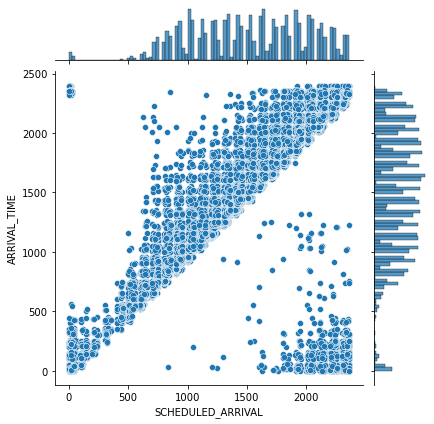

In [242]:
sns.jointplot(data=flights, x="SCHEDULED_ARRIVAL", y="ARRIVAL_TIME")


In [243]:
# correlation

In [244]:
flights.corr()

,YEAR,MONTH,DAY,DAY_OF_WEEK,FLIGHT_NUMBER,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,...,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAY,NaN,NaN,1.000000,-0.234649,0.010528,-0.021851,-0.022926,-0.055084,0.013906,-0.019942,...,-0.002447,0.012976,-0.062116,0.005190,-0.004812,0.015657,-0.011412,-0.003342,-0.009237,0.026896
DAY_OF_WEEK,NaN,NaN,-0.234649,1.000000,0.013994,0.019803,0.016215,0.019829,-0.024976,0.014085,...,0.009350,-0.003731,0.017974,0.000630,-0.002596,-0.033937,0.009049,0.017062,0.021823,-0.025405
FLIGHT_NUMBER,NaN,NaN,0.010528,0.013994,1.000000,-0.003623,0.007418,0.041114,0.066858,0.014207,...,-0.023154,-0.003472,0.066741,0.007829,0.089124,-0.015787,-0.006568,0.019844,0.072424,0.005040
SCHEDULED_DEPARTURE,NaN,NaN,-0.021851,0.019803,-0.003623,1.000000,0.956009,0.137289,-0.070673,0.926954,...,0.750327,0.603982,0.120760,-0.000600,0.005086,-0.092416,-0.008063,-0.069387,0.169190,-0.030290
DEPARTURE_TIME,NaN,NaN,-0.022926,0.016215,0.007418,0.956009,1.000000,0.219562,-0.059656,0.967973,...,0.749216,0.626246,0.200282,0.002265,0.006346,-0.071355,-0.005676,-0.015205,0.239240,-0.025297
DEPARTURE_DELAY,NaN,NaN,-0.055084,0.019829,0.041114,0.137289,0.219562,1.000000,0.073725,0.206614,...,0.125991,0.069509,0.949311,0.024080,0.032445,0.096812,0.005092,0.580843,0.594474,0.261684
TAXI_OUT,NaN,NaN,0.013906,-0.024976,0.066858,-0.070673,-0.059656,0.073725,1.000000,-0.034079,...,-0.053148,-0.043841,0.253376,0.010762,0.006733,0.382391,-0.008557,-0.036252,-0.124355,0.104183
WHEELS_OFF,NaN,NaN,-0.019942,0.014085,0.014207,0.926954,0.967973,0.206614,-0.034079,1.000000,...,0.757688,0.649142,0.192835,0.002808,0.002654,-0.063023,-0.007938,-0.024125,0.213028,-0.033415


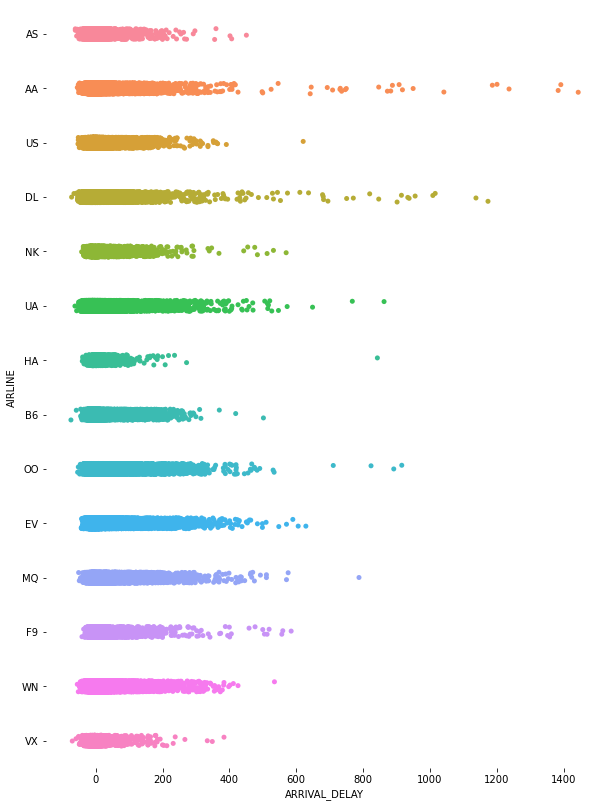

In [245]:
axis = plt.subplots(figsize=(10,14))
sns.despine(bottom=True, left=True)
# Observations with Scatter Plot
sns.stripplot(x="ARRIVAL_DELAY", y="AIRLINE",
              data = flights, dodge=True, jitter=True
            )
plt.show()

<AxesSubplot:xlabel='CANCELLATION_REASON', ylabel='count'>

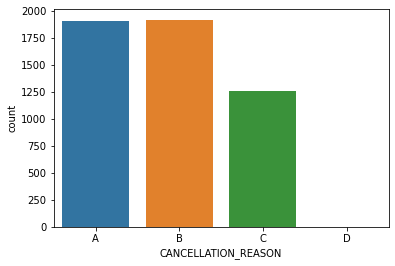

In [246]:
sns.countplot(x="CANCELLATION_REASON",data=flights)

In [247]:
#Reason for Cancellation of flight: A - Airline/Carrier, B - Weather,
#C - National Air System, D - Security
#We can observe from graph easily that mostly Whether is responsible for delays of flight


In [248]:
#Correlation of features with 'ARRIVAL_DELAY'


In [249]:
flights[flights.columns[1:]].corr()['ARRIVAL_DELAY'][:].sort_values(ascending=False)

ARRIVAL_DELAY          1.000000
DEPARTURE_DELAY        0.949311
LATE_AIRCRAFT_DELAY    0.564060
AIRLINE_DELAY          0.561757
WEATHER_DELAY          0.283222
AIR_SYSTEM_DELAY       0.272275
TAXI_OUT               0.253376
DEPARTURE_TIME         0.200282
WHEELS_OFF             0.192835
TAXI_IN                0.182982
SCHEDULED_DEPARTURE    0.120760
SCHEDULED_ARRIVAL      0.110813
WHEELS_ON              0.074704
FLIGHT_NUMBER          0.066741
ARRIVAL_TIME           0.064320
ELAPSED_TIME           0.026681
DAY_OF_WEEK            0.017974
SECURITY_DELAY         0.002480
AIR_TIME              -0.027205
DISTANCE              -0.042567
SCHEDULED_TIME        -0.044355
DAY                   -0.062116
MONTH                       NaN
DIVERTED                    NaN
CANCELLED                   NaN
Name: ARRIVAL_DELAY, dtype: float64

In [250]:
# drop unwanted columns

In [251]:
flights=flights.drop(['YEAR','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT', 'SCHEDULED_TIME',
            'DEPARTURE_TIME','WHEELS_OFF','ELAPSED_TIME', 'AIR_TIME','WHEELS_ON','DAY_OF_WEEK',
            'TAXI_IN','CANCELLATION_REASON'], axis=1)

In [252]:
# remaining columns after droping unwanted columns

In [253]:
flights.columns

Index(['MONTH', 'DAY', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [254]:
flights.shape

(200000, 16)

In [255]:
# identifying null values in dataset

In [256]:
flights.isna().sum()


MONTH                       0
DAY                         0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_DELAY          4868
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME             5234
ARRIVAL_DELAY            5599
DIVERTED                    0
CANCELLED                   0
AIR_SYSTEM_DELAY       140399
SECURITY_DELAY         140399
AIRLINE_DELAY          140399
LATE_AIRCRAFT_DELAY    140399
WEATHER_DELAY          140399
dtype: int64

In [257]:
# now replacing null values with the mean

In [258]:
flights=flights.fillna(flights.mean())
flights.isna().sum()

C:\Users\vivek\AppData\Local\Temp/ipykernel_23940/3326014180.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  flights=flights.fillna(flights.mean())


MONTH                  0
DAY                    0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
ARRIVAL_DELAY          0
DIVERTED               0
CANCELLED              0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
dtype: int64

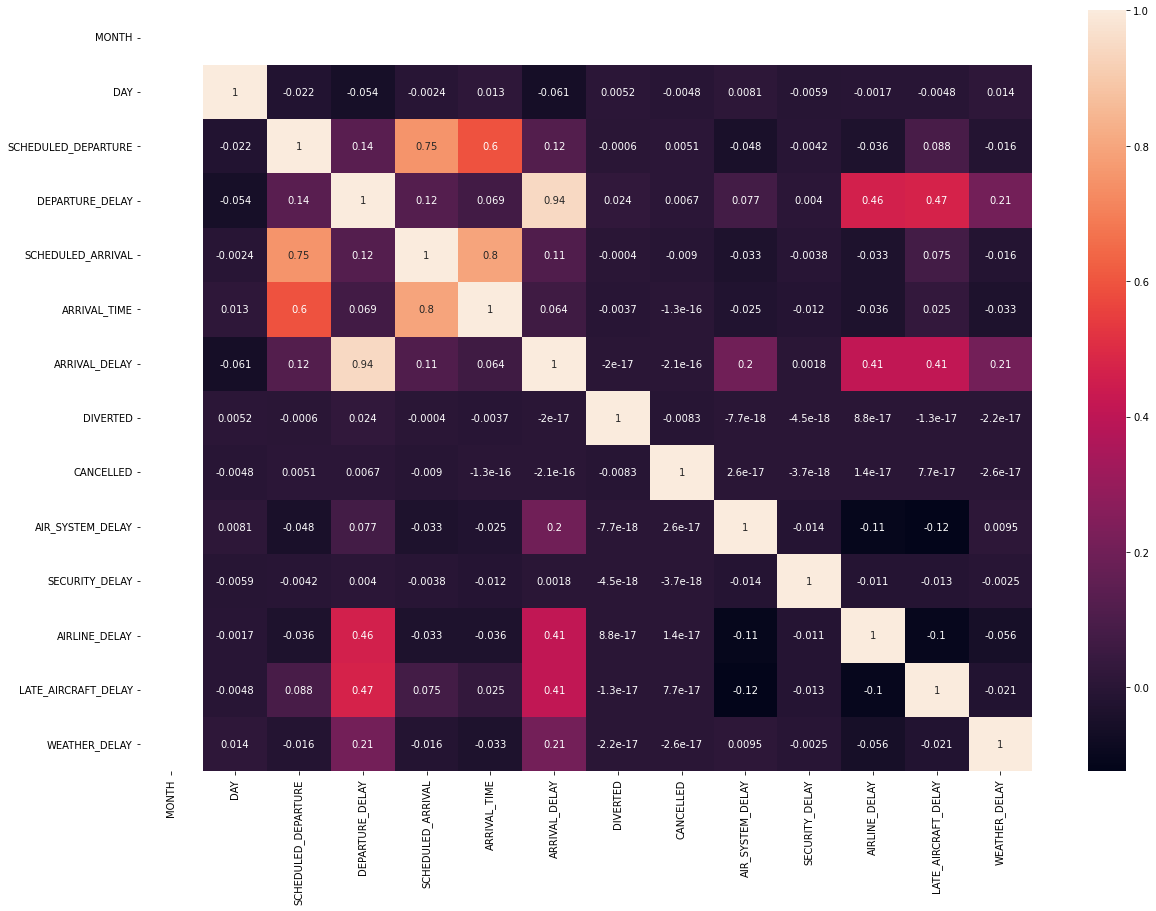

In [259]:
axis = plt.subplots(figsize=(20,14))
sns.heatmap(flights.corr(),annot = True)
plt.show()


In [260]:
#R

In [261]:
#we notice that there are no dependent variable yet which serves as our result wheather flight is delayed or not.

In [262]:
#So here I'm creating new feature called 'result' which takes the value 0 and 1. O for the resulting flight is not delayed
# and 1 for flight delayed.

In [263]:
#Here I'm Imputing these values by using the condition if 'ARRIVAL_DELAY' is greater than 15 then imputing 1 else o.

In [264]:
result=[]
for row in flights['ARRIVAL_DELAY']:
    if row > 15:
        result.append(1)
    else:
        result.append(0)  


In [265]:
flights['result'] = result

In [266]:
#after adding new column 'result'

In [267]:
flights.head()

,MONTH,DAY,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,result
0,1,1,ANC,SEA,5,-11.0,430,408.0,-22.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
1,1,1,LAX,PBI,10,-8.0,750,741.0,-9.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
2,1,1,SFO,CLT,20,-2.0,806,811.0,5.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
3,1,1,LAX,MIA,20,-5.0,805,756.0,-9.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0
4,1,1,SEA,ANC,25,-1.0,320,259.0,-21.0,0,0,13.850422,0.062851,17.760272,25.56598,3.300196,0


In [268]:
#  counts of 'result' columns, wheather 0 indicate flights is not delayed and 1 is flight delayed.

In [269]:
flights['result'].value_counts()

0    142245
1     57755
Name: result, dtype: int64

In [270]:
#Selecting only following columns for Model Building.
#'MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY','SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY','WEATHER_DELAY', 'result'

flights=flights.drop(['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_TIME', 'ARRIVAL_DELAY'],axis=1)
flights.columns

Index(['MONTH', 'DAY', 'SCHEDULED_DEPARTURE', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'DIVERTED', 'CANCELLED', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'result'],
      dtype='object')

In [271]:
# Splitting Dataset into Training and Testing with 70:30 ratio and with random_state = 42

In [272]:
flights = flights.values
X, y = flights[:,:-1], flights[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [273]:
 #Feature Scalling

In [274]:
scaled_features = StandardScaler().fit_transform(X_train, X_test)

In [275]:
# Model: DecisionTreeClassifier

In [276]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [277]:
pred = clf.predict_proba(X_test)


In [278]:
#AUC score of Model

In [279]:
auc_score = roc_auc_score(y_test, pred[:,1])
auc_score

0.9985256018068526

In [280]:
print('AUC Score of Model is: {} %'.format(round(auc_score*100,2)))


AUC Score of Model is: 99.85 %


In [281]:
#Confusion Matrix and Classification Report

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result1 = confusion_matrix(y_test, pred[:,1])
print("Confusion Matrix:")
print(result1)
print('')
result2 = classification_report(y_test, pred[:,1])
print("Classification Report:",)
print (result2)
result3 = accuracy_score(y_test,pred[:,1])
print("Accuracy:",result3)

Confusion Matrix:
[[42694    32]
 [   38 17236]]

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     42726
         1.0       1.00      1.00      1.00     17274

    accuracy                           1.00     60000
   macro avg       1.00      1.00      1.00     60000
weighted avg       1.00      1.00      1.00     60000

Accuracy: 0.9988333333333334


Text(0.5, 257.44, 'Predicted label')

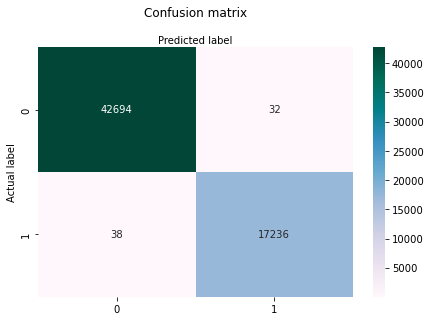

In [282]:
class_names=[0,1]
fig,ax=plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(result1), annot=True, cmap="PuBuGn" ,fmt='g')
## visualized confusion matrix using heatmap
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [283]:
# Receiver Operating Characteristic (ROC) curve of DecisionTreeClassifier


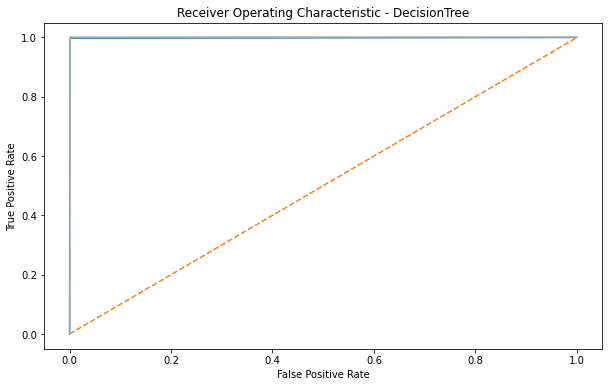

In [284]:
plt.subplots(1, figsize=(10,6))
plt.title('Receiver Operating Characteristic - DecisionTree')
y_pred_proba = clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
plt.plot(fpr, tpr)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [285]:
print("Accuracy Achieved:",round(metrics.accuracy_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Precision Achieved:",round(metrics.precision_score(y_test, pred[:,1])*100,2),'%')
print(' ')
print("Recall Achieved:",round(metrics.recall_score(y_test, pred[:,1])*100,2),'%')

Accuracy Achieved: 99.88 %
 
Precision Achieved: 99.81 %
 
Recall Achieved: 99.78 %


In [286]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train,y_train)


RandomForestRegressor()

In [287]:
y_pred = reg_rf.predict(X_test)
reg_rf.score(X_train,y_train)

0.9994797594447623

In [288]:
reg_rf.score(X_test,y_test)

0.9965971605427068

In [289]:
metrics.r2_score(y_test,y_pred)

0.9965971605427068

In [290]:
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test,y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 0.0019898333333333335
MSE: 0.0006976283333333333
RMSE: 0.026412654795255498


In [ ]:
# linear regression

In [291]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print("MSE =", metrics.mean_squared_error(predictions, y))

MSE = 0.04581813481688279


In [ ]:
# polynomial regression

In [293]:
poly = PolynomialFeatures(degree = 2)
regr = linear_model.LinearRegression()
X_ = poly.fit_transform(X)
regr.fit(X_, y)

LinearRegression()

In [294]:
result = regr.predict(X_)
print("MSE =", metrics.mean_squared_error(result, y))


MSE = 0.032223967450233156
